In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
v1, v2, orientations = pickle.load(open("June 28 data.pickle", "rb"))

#orientations = pickle.load(open("website/1499283897.5709112", "rb"))


In [2]:
alpha, beta, gamma, otime = [np.array([o[name] for o in orientations]) for name in ("alpha", "beta", "gamma", "time")]

In [3]:
def angletomatrix(alpha, beta, gamma):
    """
    Returns a matrix that transforms from world coordinates to device coordinates
    """
    
    cA = np.cos(alpha)
    cB = np.cos(beta)
    cC = np.cos(gamma)
    sA = np.sin(alpha)
    sB = np.sin(beta)
    sC = np.sin(gamma)
    
    M1 = np.matrix([[cC,   0,  sC],
                    [0,    1,   0],
                    [-sC,  0,  cC]])
    
    M2 = np.matrix([[1,    0,   0],
                    [0,   cB, -sB],
                    [0,   sB,  cB]])
    
    M3 = np.matrix([[cA, -sA,   0],
                    [sA,  cA,   0],
                    [0,    0,   1]])
 
    return (M1 * M2 * M3)

In [4]:
import scipy.interpolate

getAlpha = scipy.interpolate.interp1d(otime, alpha, assume_sorted=True)
getBeta = scipy.interpolate.interp1d(otime, beta, assume_sorted=True)
getGamma = scipy.interpolate.interp1d(otime, gamma, assume_sorted=True)


def rotation(time):
    c = 2 * np.pi / 360
    #ALPHA IS NEGATIVE HERE, AS FAR AS I CAN TELL BUG IN SPEC
    return angletomatrix(-getAlpha(time) * c, getBeta(time) * c, getGamma(time) * c)
""""""


''

In [5]:
R1 = [rotation(time) for time in v1[0]]
R1 = np.array(R1)

R2 = [rotation(time) for time in v2[0]]
R2 = np.array(R2)

In [6]:
#R3 = [rotation(time) for time in otime]

In [7]:
#plt.plot(R1[:,1, 2], R1[:, 2, 2])
#plt.show()

In [6]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = [10, 10]
W = 768
x, y = np.meshgrid(np.linspace(0, 700, W), np.linspace(-350, 350, W))
z = np.zeros((W, W))

x, y, z = [i.flatten() for i in (x, y, z)]
#xp, yp, zp = [arr.reshape(W, W) for arr in np.matmul(R[0], np.array([x, y, z]))]

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [8]:
def coords(r):
    xp, yp, zp = np.array(np.matmul(r.transpose(), np.array([y, x, z])), dtype = np.int)
    return xp + 400, yp + 400, zp + 790

In [9]:

"""
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')    

for r in ():#R3[::15]:
    #print(r)
    xp, yp, zp = [arr.reshape(W, W) for arr in np.matmul(r.transpose(), np.array([y, x, z]))]
    n.append((xp, yp, zp)) # or else it falls out of memory
    ax.plot_wireframe(xp, yp, zp)

for r in R1[::50]:
    #print(r)
    xp, yp, zp = [arr.reshape(W, W) for arr in np.matmul(r.transpose(), np.array([y, x, z]))]
    n.append((xp, yp, zp)) # or else it falls out of memory
    ax.plot_wireframe(xp, yp, zp, colors="red", )
    
for r in R2[::50]:
    #print(r)
    xp, yp, zp = [arr.reshape(W, W) for arr in np.matmul(r.transpose(), np.array([y, x, z]))]
    n.append((xp, yp, zp)) # or else it falls out of memory
    ax.plot_wireframe(xp, yp, zp, colors="green")


ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()
"""

'\nfig = plt.figure()\nax = fig.add_subplot(111, projection=\'3d\')    \n\nfor r in ():#R3[::15]:\n    #print(r)\n    xp, yp, zp = [arr.reshape(W, W) for arr in np.matmul(r.transpose(), np.array([y, x, z]))]\n    n.append((xp, yp, zp)) # or else it falls out of memory\n    ax.plot_wireframe(xp, yp, zp)\n\nfor r in R1[::50]:\n    #print(r)\n    xp, yp, zp = [arr.reshape(W, W) for arr in np.matmul(r.transpose(), np.array([y, x, z]))]\n    n.append((xp, yp, zp)) # or else it falls out of memory\n    ax.plot_wireframe(xp, yp, zp, colors="red", )\n    \nfor r in R2[::50]:\n    #print(r)\n    xp, yp, zp = [arr.reshape(W, W) for arr in np.matmul(r.transpose(), np.array([y, x, z]))]\n    n.append((xp, yp, zp)) # or else it falls out of memory\n    ax.plot_wireframe(xp, yp, zp, colors="green")\n\n\nax.set_xlabel(\'X axis\')\nax.set_ylabel(\'Y axis\')\nax.set_zlabel(\'Z axis\')\n\nplt.show()\n'

In [10]:
image1 = np.zeros((1000, 1000, 1000))
image2 = np.zeros((1000, 1000, 1000))

In [11]:
w1, w2 = [np.sum(arr, 3) for arr in (v1[1], v2[1])]

In [14]:
def blit(R, w, idx, image):
    xp, yp, zp = coords(R[idx])
    f = (w[idx]).transpose().flatten()
    image[xp, yp, zp] = f

In [15]:
for i in range(400):
    blit(R1, w1, i, image1)
    blit(R2, w2, i, image2)

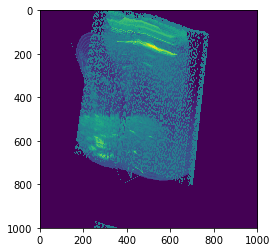

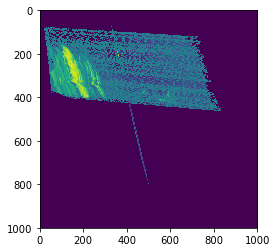

In [31]:
i = 200
plt.imshow(np.max(image1, 2))
plt.show()
plt.imshow(np.max(image2, 2))
plt.show()

In [21]:
%matplotlib inline

In [16]:
import itk


In [17]:
def scale_for_image(components):
    return np.array(255. * (components - np.min(components)) / (np.max(components) - np.min(components)), dtype=np.uint8)

def writeVolume(nparray, name):
    ImageType = itk.Image[itk.UC, 3]
    ReaderType = itk.ImageFileReader[ImageType]
    buff = itk.BridgeNumPy.PyBuffer[ImageType]
    x = scale_for_image(nparray).copy() # necessary to store x in a named variable so it isn't deleted, since Im will be a view
    Im = buff.GetImageFromArray(x)
    Im.Update()
    #print Im
    WriterType = itk.ImageFileWriter[ImageType]
    writer = WriterType.New()
    writer.SetInput(Im)
    writer.SetFileName(name)
    writer.Update()

In [18]:
writeVolume(image1, "image1.mha")

In [19]:
writeVolume(image2, "image2.mha")